# This notebook plots the error and accuracy of each 2D tested models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading results files from applied models:

In [2]:
def readResults(path, filename):
    f = open(path + filename, "r")
    perfs = []

    lines = f.readlines()

    indexes = []

    for el in lines:

        values = []
        idxs   = []

        elements = el.split(" ")

        idxs.append(elements[0])

        elements = elements[1:]


        for i, val in enumerate(elements):
            if("\n" not in val):
                if i ==0:
                    values.append(int(val.split(",")[0]))
                else:
                    values.append(float(val.split("=")[1]))
                    idxs.append(val.split("=")[0])


        indexes.append(idxs)
        perfs.append(values)


    f.close()
    return perfs, indexes

#### Plotting the results:

In [3]:
## Defining the plot function:

def plotPerf(Epochs, train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc,
             name = "Model", vert_line = False, at_x_value = 40):
    
    plt.figure(figsize=(20,10))

    
    labels = ["training running loss", "training running accuracy", "validation best class accuracy", "validation loss", "validation window accuracy"]
    for i, values in enumerate([train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc]):
        plt.plot(Epochs, values, label=labels[i])
    
    ## If the user wants to plot a vertical line, we do so at_x_value:
    if(vert_line):plt.axvline(x=at_x_value,color='gray', label="Optimal Capacity", linestyle='--')
    
    plt.title("The performance of the " + name, fontsize=20)
    plt.xlabel("Number of Epochs", fontsize=15)
    #plt.ylabel("")
    leg = plt.legend(loc='upper right', ncol=1, mode="no", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)
    plt.show()
    

In [4]:
def PlotPerfs(name, used_var):
    Epochs           = [used_var[i][0] for i in range (0, len(used_var))]
    train_loss       = [used_var[i][1] for i in range (0, len(used_var))]
    train_acc        = [used_var[i][2] for i in range (0, len(used_var))]
    valid_bc_acc     = [used_var[i][3] for i in range (0, len(used_var))]
    valid_loss       = [used_var[i][4] for i in range (0, len(used_var))]
    valid_window_acc = [used_var[i][5] for i in range (0, len(used_var))]
    
    plotPerf(Epochs, train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc, name)

    ## Computing max accuracy on validation in percentage:
    Max_accuracy = max(valid_bc_acc) * 100

    print('\n \t\t\t\t Maximum accuracy in percentage on validation set is : {}'.format(int(Max_accuracy* 1.e+3)*1.e-3))

## First 2D models:

### 1- Results of the model with a Conv2d kernel = (3, 3), maxpool = (2f, 3t), Energy_size =30, Energy_stride = 15, CNNlays=4, initial lr=0.005: 

In [9]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy1000ms_Scheduler0.2_Window800ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename+= "_Notebook"
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

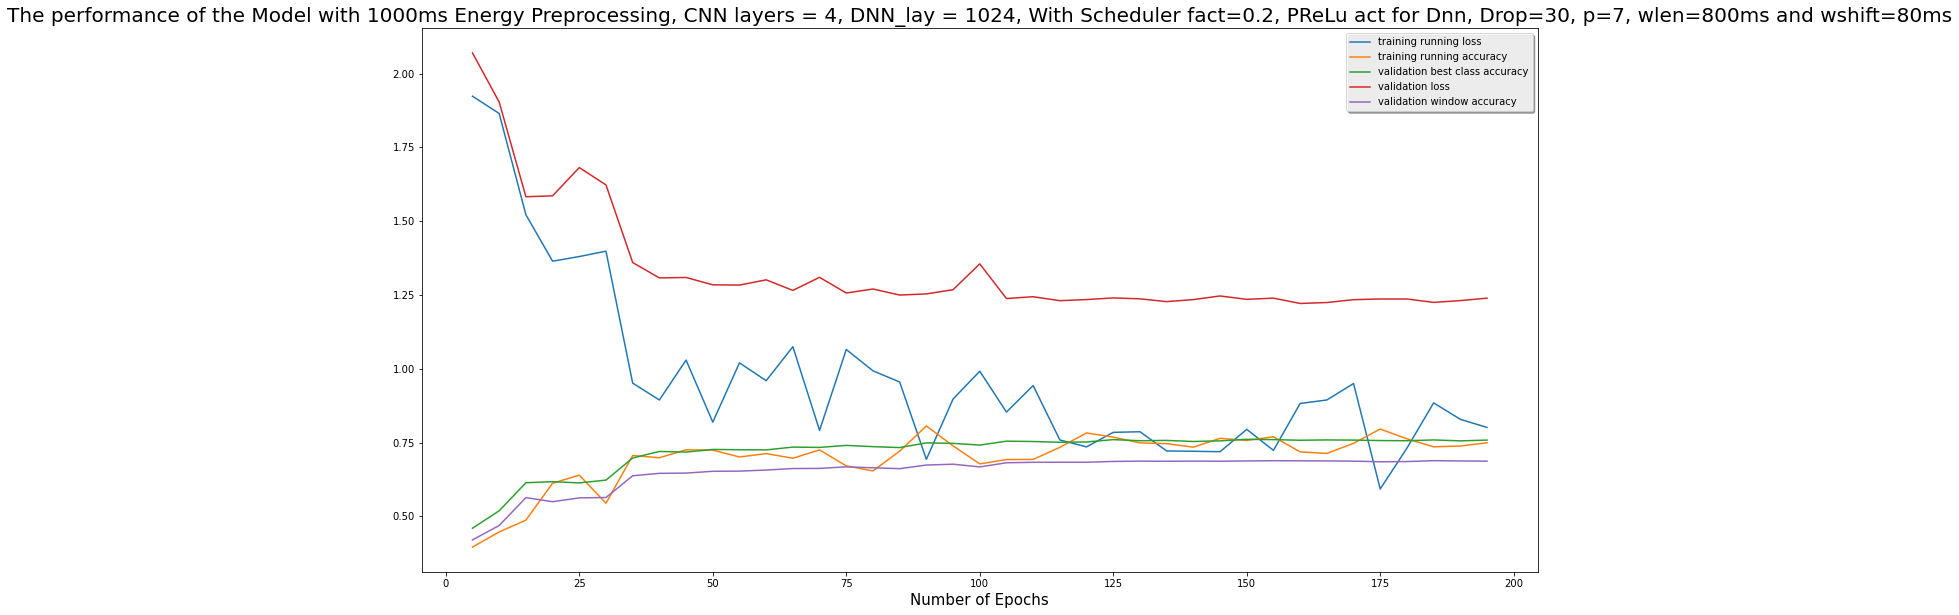


 				 Maximum accuracy in percentage on validation set is : 76.095

					    This model used 11180020 parameters.


In [14]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format(11180020))

### 2- Results of the model with a Conv2d kernel = (3, 3), maxpool = (2f, 3t), Energy_size =30, Energy_stride = 15, CNNlays=3, initial lr=0.005: 

In [40]:
path = "exp/SincNet2D_DCASE/CNNlay3_Rand0PreEnergy1000ms_Scheduler0.2_Window800ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename+= "_Notebook"
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

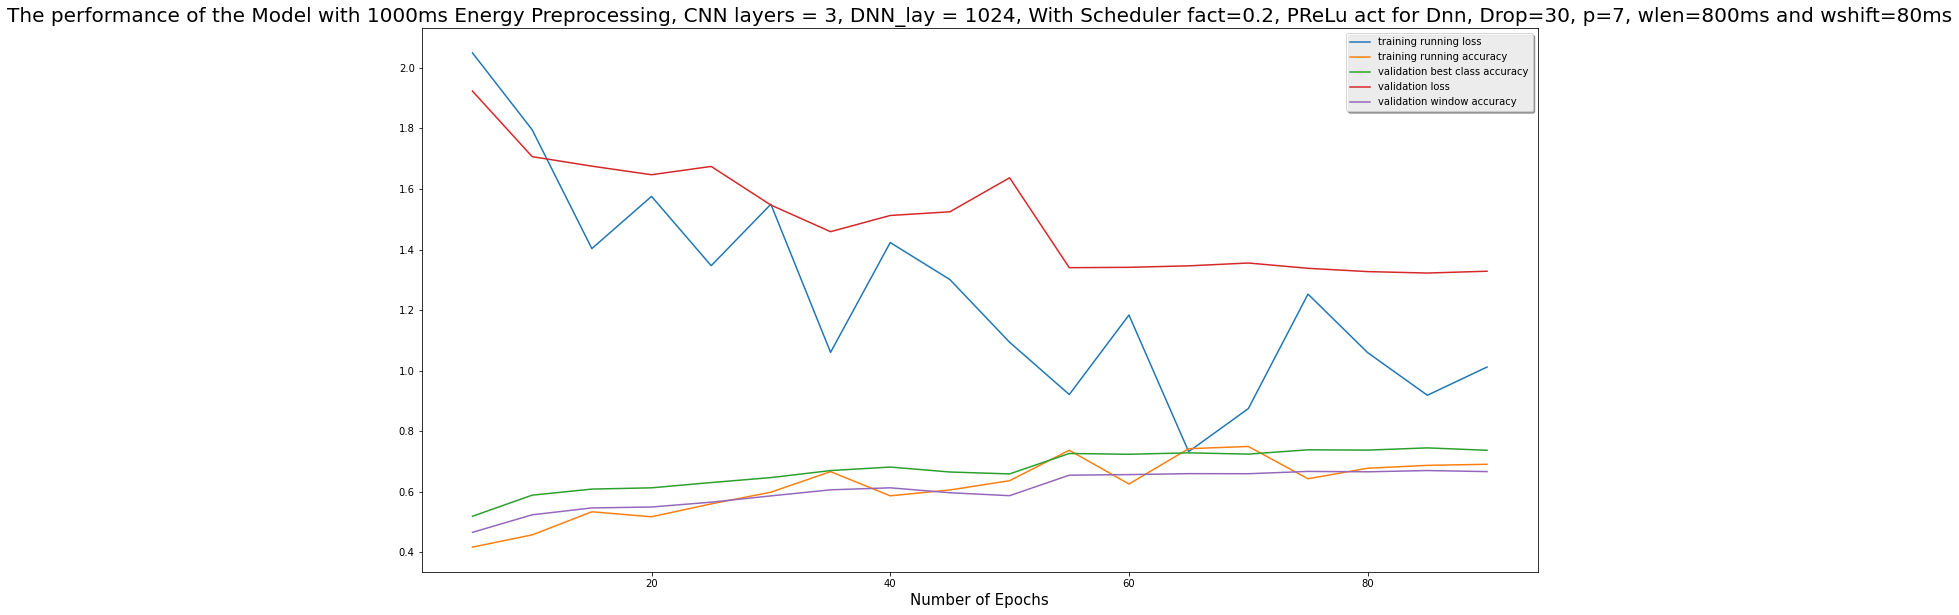


 				 Maximum accuracy in percentage on validation set is : 74.459

					    This model used 24186040 parameters.


In [41]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, CNN layers = 3, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format(24186040))

### 3- Results of the model with a Conv2d kernel = (3, 3), maxpool = (2f, 3t), Energy_size =60, Energy_stride = 30, CNNlays=4, initial lr=0.001:

In [42]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy4000ms_Scheduler0.2_Window3000ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

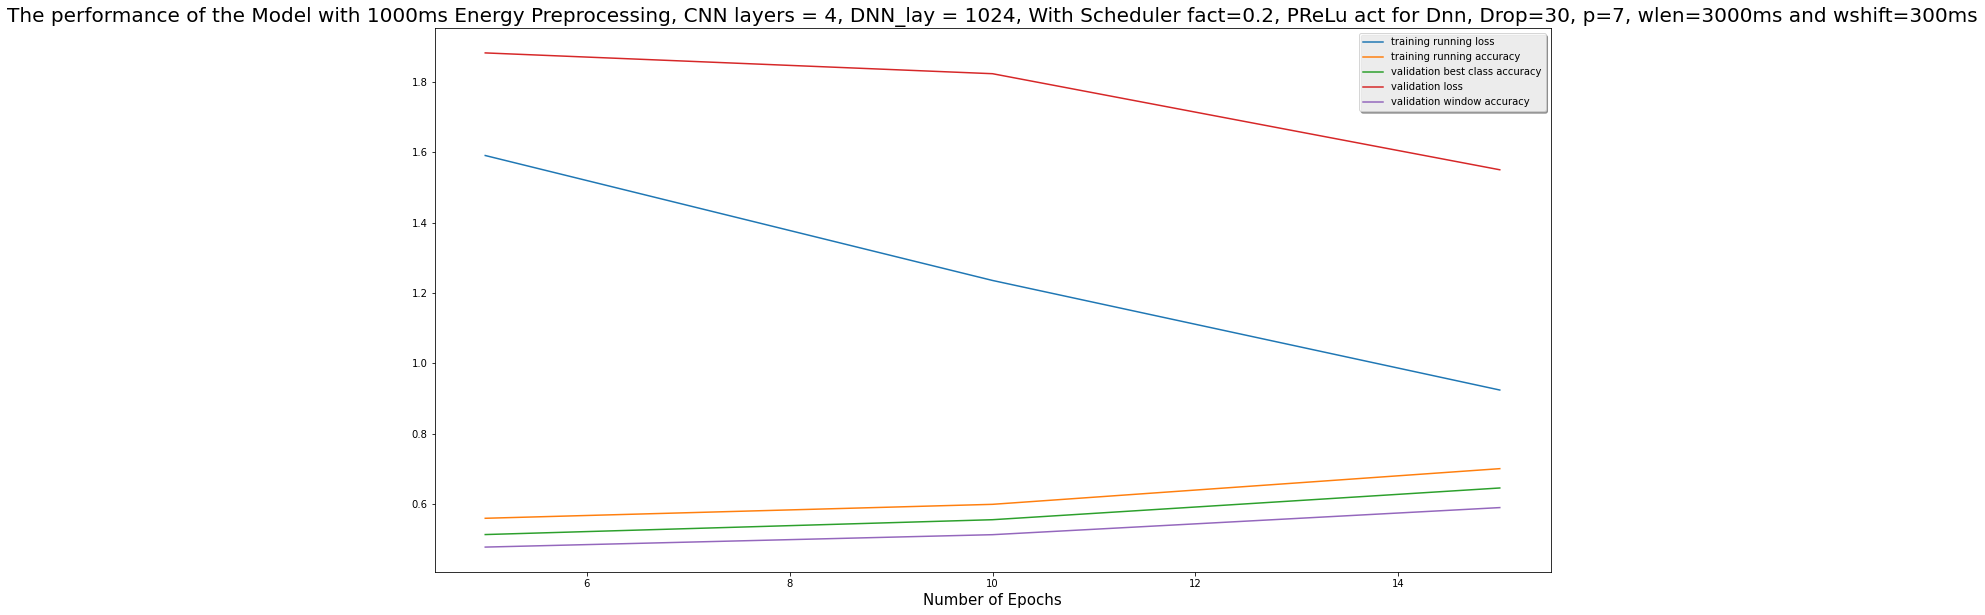


 				 Maximum accuracy in percentage on validation set is : 64.538

					    This model used 26016140 parameters.


In [43]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=3000ms and wshift=300ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format(26016140))